In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


In [89]:
data_dir  = './bill_challenge_datasets'
train_graph = pd.read_csv(f'{data_dir}/Training/training_graph.csv')
page_label = pd.read_csv(f'{data_dir}/Training/node_classification.csv')
iso_nodes = pd.read_csv(f'{data_dir}/Training/isolated_nodes.csv')
iso_nodes = list(iso_nodes.nodes)

f = open(f'{data_dir}/Training/node_features_text.json')
corpus = json.load(f)
f.close()

print(len(train_graph.node1.unique()))
print(len(train_graph.node2.unique()))
print('Page type labels:')
print(page_label.page_type.unique())

16706
16890
Page type labels:
[1 2 3 4]


In [172]:
len(node_occurences)
# len(unique(node_occurences))

264076

20816
19934


Text(0.5, 1.0, 'Histogram: #links from each node')

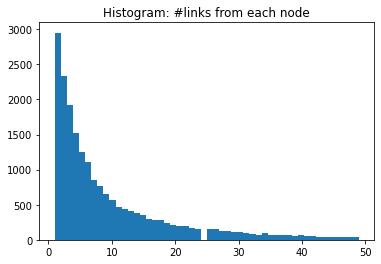

In [174]:
from collections import Counter
node_occurences = list(train_graph.node1)+ list(train_graph.node2)
w = Counter(node_occurences)
# plt.bar(w.keys(), w.values())
# plt.hist(w.values(), bins=50)
freq = list(w.values())
print(len(freq))
freq = [x for x in freq if x<50]
print(len(freq))
plt.hist(freq, bins=50)
plt.title('Histogram: #links from each node')

In [3]:
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
final_corpus = []
for k in corpus.keys():
    final_corpus.append(corpus[k])

    
# Fit word2vec model (Skip-Gram Model)
model_w2v = Word2Vec(final_corpus, min_count=2, window=4, seed = 20, sg=1, workers=3)

In [4]:
model_w2v.save('w2v.model')
model_w2v.wv.save_word2vec_format('w2v_model.txt', 'w2v_vocab.txt', binary=False)

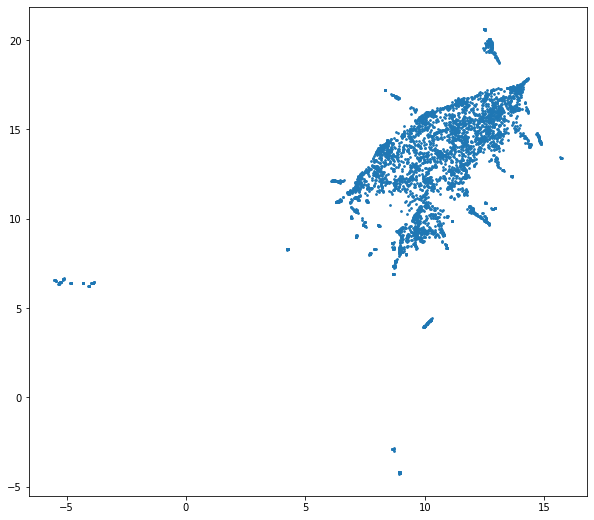

In [6]:
word_list = model_w2v.wv.index_to_key
w2v_dm = np.array([list(model_w2v.wv[x]) for x in word_list])
import umap.umap_ as umap
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(w2v_dm)
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [98]:
import networkx as nx
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.nn import functional
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from torch_geometric.data import Data



In [120]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument([str(x) for x in d], [i]) for i, d in enumerate(final_corpus)]
tagged_data
model = Doc2Vec(tagged_data, vector_size = 10, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
# model.wv.vocab

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [130]:
model.infer_vector([str(x) for x in final_corpus[0]])
# tagged_data
# model.wv.index_to_key

array([ 0.6568229 ,  0.25613257,  0.8370686 ,  0.5595869 ,  0.16257736,
        0.35322842, -0.09525891,  0.83455455,  0.14457473, -0.3105152 ],
      dtype=float32)

In [94]:
def unique(list1):
    x = np.array(list1)
    return np.unique(x)

# edges = list(set([(a, b)for o in movie_link]))
edges = []
for index, row in train_graph.iterrows():
    if row.node1 != row.node2: #and row.node1 not in iso_nodes and \
        #row.node2 not in iso_nodes:
        edges.append(set((row.node1, row.node2)))

edges = [set(x) for x in edges]
graph = nx.Graph()
graph.add_nodes_from(unique(node_occurences), bipartite=0, label='page')
graph.add_edges_from(edges, label='link')
print(nx.info(graph))

Graph with 20816 nodes and 131889 edges


In [93]:
training_graph = list((graph.subgraph(c) for c in nx.connected_components(graph)))[0]
print(nx.info(training_graph))

Graph with 20589 nodes and 131695 edges


In [ ]:
# PLOT confusion matrix for labels